# <font color="red">Création d'un</font> _dataset_ d'images
---

In [1]:
# Always run this cell to display the complete output in the cells, not just the last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Après ce tuto, vous pourrez:

* Manipulez des images avec OpenCV.
* Apportez des modifications aux images et appliquez des  méthodes d’augmentation des données.
* Créer votre propre dataset d'images pour l'apprentissage automatique.

---
## <font color="red">1 | LES</font> PAQUETS
---
Importons d’abord tous les packages dont vous aurez besoin:

* [pathlib](https://docs.python.org/3/library/pathlib.html) : Des classes représentant des chemins de système de fichiers avec une sémantique appropriée pour différents systèmes d'exploitation.
* [mathplotlib](https://matplotlib.org/) : C'est une bibliothèque pour tracer des graphiques en Python.
* [cv2](https://github.com/skvark/opencv-python) : Unofficial pre-built OpenCV packages for Python.
* [numpy](https://numpy.org/) : Extension destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.
* [imutils](https://pypi.org/project/imutils/): Une série de fonctions pratiques permettant de simplifier les fonctions de traitement d’images
* [random](https://docs.python.org/3/library/random.html) : Ce module implémente des générateurs de nombres pseudo-aléatoires pour diverses distributions.
* [pickle]() : Ce module permet de sauvegarder dans un fichier, au format binaire,  n'importe quel objet Python.

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import numpy as np
import imutils
import random
import pickle

---
## <font color="red"> 2 | NOTIONS DE BASE</font> SUR OpenCV
---
OpenCV (Open Source Computer Vision Library) est une bibliothèque dotée de nombreuses fonctionnalités, outils, algorithmes et utilitaires permettant de gérer les images et les ressources associées aux images.

In [3]:
# Path to the image used in the examples
path = Path.cwd() / "images" / "124_Circle2.jpg"

# Reading the image
image = cv2.imread(str(path))
type(image)

numpy.ndarray

Comme vous pouvez le constater, les images sont lues comme des tableaux `numpy` ordinaires :

In [4]:
# Image shape shows image size (width, heigth, color chanels)
image.shape

(4032, 3024, 3)

We can visualize the image at any moment with `matplotlib` :

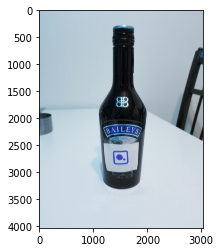

In [5]:
# Plot image
plt.imshow(image)

### <font color="red">2.1 - Transformation du</font> format RBG to RGB
---
OpenCV utilise le format de pixel BGR par défaut. Le standard le plus courant pour les ordinateurs et les bibliothèques (comme matplotlib) est le RGB. La conversion de BGR en RGB est simple:

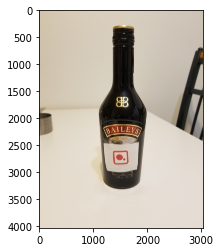

In [6]:
# BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot image
plt.imshow(image)

### <font color="red">2.2 - Image en</font> niveau de gris
---
Nous pouvons utiliser une approche similaire pour transformer notre image en niveau de gris: 

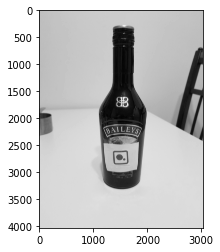

In [7]:
# RGB to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Plot image
plt.imshow(gray_image, cmap='gray')

In [8]:
# Color image size
image.shape

# Gray image size
gray_image.shape

(4032, 3024, 3)

(4032, 3024)

Notez que l'image en niveaux de gris n'a qu'un seul canal.

### <font color="red">2.3 - Redimensionnement</font> d'images
---
Le redimensionnement des images est important pour plusieurs raisons:

* Tout d'abord, vous voudrez peut-être redimensionner une grande image pour qu'elle tienne sur votre écran.

* Le traitement des images est également plus rapide sur les images plus petites car il y a moins de pixels à traiter. 

* Dans le cas du *Deep Learning*, nous redimensionnons souvent les images, en ignorant les proportions, afin que le volume s'intègre dans un réseau nécessitant des images de certaines dimensions.

Notez que le redimensionnement déformera un peu l'image. Il est important d'analyser cet effet au cours de la phase exploratoire, car il peut avoir un effet négatif sur les résultats de votre modèle. Les fleurs et les animaux peuvent convenir avec un peu d’étirement ou de compression, mais pas les primitives du visage.

Cela peut se produire lorsque les dimensions de l'image d'origine ne correspondent pas exactement à la taille souhaitée. 

In [9]:
WIDTH = 160
HEIGHT = 120

(120, 160, 3)

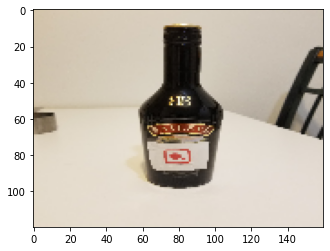

In [10]:
# Resize, ignoring aspect ratio
resized = cv2.resize(image, (WIDTH, HEIGHT))

# Plot image
plt.imshow(resized)

# Image size
resized.shape

### <font color="red">2.4 - Rééchelonnement</font> d'images
---
Essayons une autre stratégie de redimensionnement de l’image et de maintien des proportions.

Si vous imaginez des images de portrait par rapport à des images de paysage, vous saurez que beaucoup de choses peuvent être gâchées par un redimensionnement glissant. 

Le _rescaling_ consiste à supposer que vous verrouillez les proportions pour éviter toute distorsion de l’image. Dans ce cas, nous réduirons l’image du côté le plus court qui correspond à la taille d’entrée du modèle.

* Paysage: limiter le redimensionnement par la hauteur
* Portrait: limiter le redimensionnement par la largeur

À ce stade, une seule dimension est définie selon les besoins de l’entrée du modèle. Nous avons encore besoin de couper un côté pour faire un carré.

0.75


(160, 120, 3)


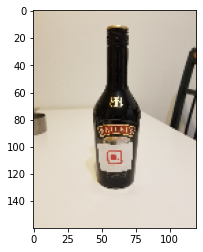

In [11]:
aspect = image.shape[1] / float(image.shape[0])
print(aspect)

if aspect > 1:
    # landscape orientation - wide image    
    res = int(HEIGHT * aspect)
    scaled = cv2.resize(image, (res, HEIGHT))
if aspect < 1:    
    # portrait orientation - tall image
    res = int(WIDTH * aspect)
    scaled = cv2.resize(image, (res, WIDTH))
if aspect == 1:
    scaled = cv2.resize(image, (WIDTH, HEIGHT))

# show image
plt.imshow(scaled)
print(scaled.shape)

### <font color="red">2.5 - Retournement</font> d'images
---
La prochaine étape sur nos transformations d’image à explorer est le retournement d’une image. Nous pouvons retourner une image autour de l'axe des x ou des y, ou les deux.

Comment retourner une image s’explique mieux en regardant la sortie du code :

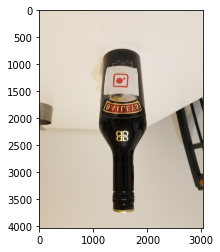

In [12]:
flipVertical = cv2.flip(image, 0)
plt.imshow(flipVertical)

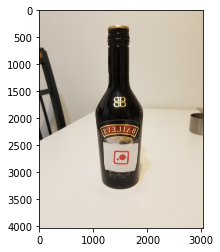

In [13]:
flipHorizontal = cv2.flip(image, 1)
plt.imshow(flipHorizontal)

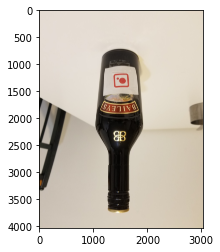

In [14]:
flipBoth = cv2.flip(image, -1)
plt.imshow(flipBoth)

### <font color="red">2.6 - Assombrir et éclaircir</font> les images
---
Ces actions sont réalisées à l'aide d'arithmétique d'image. En partant du fait que les images ne sont que des matrices numériques, vous pouvez effectuer des opérations telles que l’ajout ou la soustraction de valeurs à chacun de ses éléments.

In [15]:
M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)

M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)

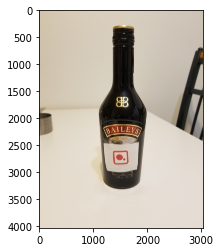

In [16]:
plt.imshow(image)

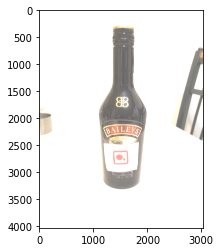

In [17]:
plt.imshow(added)

Notez que l’image semble plus «délavée» et est nettement plus lumineuse que l’original. En effet, nous augmentons les intensités de pixels en leur ajoutant 100 et en les poussant vers des couleurs plus vives.

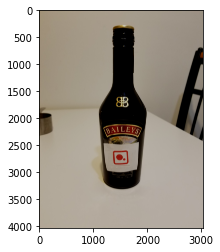

In [18]:
plt.imshow(subtracted)

Notre image semble maintenant beaucoup plus sombre que l'original. Les pixels autrefois blancs sont maintenant gris. En effet, nous soustrayons 50 pixels et les poussons vers les régions les plus sombres de l'espace colorimétrique RGB.

### <font color="red">2.7 - Rotation</font>
---
La rotation correspond exactement à ce que cela ressemble : faire pivoter une image d’un angle donné. Dans cette section, nous verrons comment faire pivoter une image.

Lorsque nous faisons pivoter une image, nous devons spécifier autour du point que nous voulons faire pivoter. Dans la plupart des cas, vous souhaiterez effectuer une rotation autour du centre de l'image. Cependant, OpenCV vous permet de spécifier tout point arbitraire sur lequel vous souhaitez faire pivoter.

Nous définissons une matrice pour faire pivoter l'image. Au lieu de construire manuellement la matrice avec numpy, nous allons simplement appeler la méthode `cv2.getRotationMatrix2D`.

Une fois que nous avons notre matrice de rotation M de la fonction `cv2.getRotationMatrix2D`, nous pouvons appliquer la rotation à notre image à l’aide de `cv2.warpAffine`.

(4032, 3024, 3)

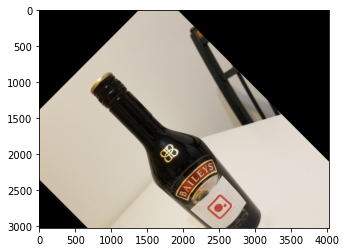

In [19]:
# Getting image size
w, h  = image.shape[:2]

# Rotations angle
angle = 45

# Scaling factor
scale = 1

# Image center
center = (w / 2, h / 2)

M = cv2.getRotationMatrix2D(center, angle, scale)

# Image rotation
rotated = cv2.warpAffine(image, M, (w, h))

image.shape
plt.imshow(rotated)

---
## <font color="red">3 | DÉTECTION</font> DES FORMES
---
Dans cette section, nous allons créer un détecteur de forme pour détecter les formes de certains marqueurs de Cozmo. 

![cozmo_custom_markers](images/cozmo_custom_markers.jpg)

La première étape dans la construction de notre détecteur de forme consiste à écrire du code pour encapsuler la logique d’identification de formes.

Définissons notre méthode `detect_shape` :

In [20]:
def detect_shape(contour):
    # initialize the shape name and approximate the contour
    shape = "unidentified"
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

Nous avons notre méthode de détection qui ne nécessite qu'un seul argument, le contour de la forme que nous essayons d'identifier.

Pour effectuer la détection de forme, nous utiliserons l’approximation des contours.

Comme son nom l'indique, l'approximation des contours est un algorithme permettant de réduire le nombre de points d'une courbe avec un ensemble de points réduit, d'où l'appellation d'approximation.

Cet algorithme est généralement appelé algorithme de [Ramer-Douglas-Peucker](https://fr.wikipedia.org/wiki/Algorithme_de_Douglas-Peucker), ou simplement _split-and-merge algorithm_.

L’approximation du contour est fondée sur l’hypothèse qu’une courbe peut être approchée par une série de segments de ligne courts. Cela conduit à une courbe approximative résultante qui consiste en un sous-ensemble de points définis par la crue originale.

L’approximation du contour est en réalité déjà implémentée dans OpenCV via la méthode `cv2.approxPolyDP`.
Pour effectuer l'approximation des contours, nous calculons d'abord le périmètre du contour (**ligne 4**), puis construisons l'approximation réelle des contours (**ligne 5**).

Les valeurs communes pour le second paramètre de `cv2.approxPolyDP` sont normalement comprises entre 1 et 5% du périmètre de contour d'origine.

Étant donné notre contour approximatif, nous pouvons passer à la détection de forme:

In [21]:
def detect_shape(contour):
    # initialize the shape name and approximate the contour
    shape = "unidentified"
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)
    
    # if the shape is a triangle, it will have 3 vertices
    if len(approx) == 3:
        shape = "triangle"

    # if the shape has 4 vertices, it is either a square or
    # a rectangle
    elif len(approx) == 4:
        # compute the bounding box of the contour and use the
        # bounding box to compute the aspect ratio
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)

        # a square will have an aspect ratio that is approximately
        # equal to one, otherwise, the shape is a rectangle
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "diamond"

    # if the shape is a pentagon, it will have 5 vertices
    elif len(approx) == 5:
        shape = "hexagon"

    # otherwise, we assume the shape is a circle
    else:
        shape = "circle"

    # return the name of the shape
    return shape

Il est important de comprendre qu’un contour consiste en une liste de sommets. Nous pouvons vérifier le nombre d'entrées dans cette liste pour déterminer la forme d'un objet.

Par exemple, si le contour approximatif a trois sommets, il doit alors s'agir d'un triangle (**lignes 8 et 9**).

Si un contour a quatre sommets, il doit s'agir d'un carré ou d'un rectangle (**ligne 13**). Pour déterminer lequel, nous calculons le rapport d'aspect, qui est simplement la largeur du cadre de contour divisé par la hauteur (**lignes 16 et 17**). Si le rapport d'aspect est ~ 1,0, nous examinons un carré (puisque tous les côtés ont une longueur approximativement égale). Sinon, la forme est un rectangle.

Si un contour a six sommets, on peut le qualifier d'hexagone (**lignes 24 et 25**).

Sinon, par processus d'élimination (dans le contexte de cet exemple, bien sûr), nous pouvons supposer que la forme que nous examinons est un cercle (**lignes 28 et 29**).

Enfin, nous renvoyons la forme identifiée à la méthode appelante.

### <font color="red">3.1 - Détection</font> avec OpenCV
---
Commençons pour le prétraitement de notre image :

In [26]:
# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread("images/cozmo_custom_markers.jpg")
bitwise = cv2.bitwise_not(image)
resized = imutils.resize(bitwise, width=300)
ratio = image.shape[0] / float(resized.shape[0])

# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

### load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread("cozmo_custom_markers.jpg")
bitwise = cv2.bitwise_not(image)
resized = imutils.resize(bitwise, width=300)
ratio = image.shape[0] / float(resized.shape[0])

# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

Tout d'abord, nous chargeons notre image et la redimensionnons. Nous suivons ensuite le ratio de l'ancienne hauteur par rapport à la nouvelle hauteur redimensionnée, nous verrons exactement pourquoi nous faisons cela plus loin dans le tutoriel.

De là, les **lignes 10-12** gèrent la conversion de l'image redimensionnée en niveaux de gris, en la lissant pour réduire le bruit à haute fréquence, et finalement en la seuilant pour révéler les formes dans l'image.

Après le seuillage, notre image devrait ressembler à ceci :

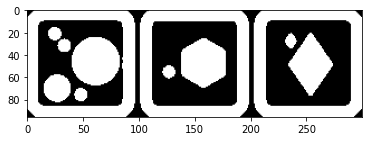

In [27]:
plt.imshow(thresh, cmap='gray')

Remarquez comment notre image a été binarisée, les formes apparaissent comme un premier plan blanc sur un fond noir.

Enfin, nous trouvons des contours dans notre image binaire, gérons la saisie de la valeur de tuple correcte dans `cv2.findContours` à partir de notre version OpenCV.

La dernière étape consiste à identifier chacun des contours :

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[[255, 255, 255],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [247, 247, 247],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [255, 255, 255],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

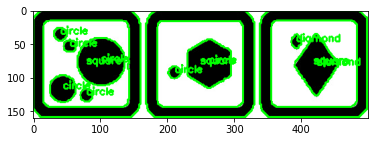

In [28]:
# loop over the contours
for c in cnts:
    # compute the center of the contour, then detect the name of the
    # shape using only the contour
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]) * ratio)
    cY = int((M["m01"] / M["m00"]) * ratio)
    shape = detect_shape(c)

    # multiply the contour (x, y)-coordinates by the resize ratio,
    # then draw the contours and the name of the shape on the image
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # For display the result in jupyter notebooks
    plt.imshow(image)
    
    # Uncomment when running in console for displaying the result
    # show the output image
    # cv2.imshow("Image", image)
    # cv2.waitKey(0)

Nous commençons à faire des boucles sur chacun des contours individuels. Pour chacun d'eux, nous calculons le centre du contour, puis nous effectuons la détection de forme et l'étiquetage.

Puisque nous traitons les contours extraits de l'image redimensionnée (plutôt que l'image originale), nous devons multiplier les contours et les coordonnées du centre (x, y) par notre rapport de redimensionnement (**lignes 12-14**). Cela nous donnera les coordonnées (x, y) correctes pour les contours et le centroïde de l'image originale.

Enfin, nous dessinons les contours et la forme étiquetée sur notre image (lignes 15-16), puis nous affichons nos résultats.

Pour une expérience plus interactive, exécuter ce programme dans la console.

---
## <font color="red">4 | CRÉATION</font> D'UN _DATASET_
---
Nous avons collecté beaucoup d'images de la caméra de cozmo afin de créer notre propre ensemble de données. Idéalement nous devrions stocker environ la même quantité d'images pour chaque classe.

Il existe également un outil puissant pour vous aider à créer plus de données, appelé **augmentation de données**. Il modifie simplement une image et restitue de nombreuses images nouvelles et uniques, toutes basées sur la première, en les retournant, en les faisant pivoter ou en les recadrant. C'est ça ce que vous ferez dans l'étape suivante.

Assurez-vous que toutes les données sont classées dans un dossier prévu à cet effet, dans lequel chaque classe a son propre sous-dossier. La structure de notre ensemble de données doit être la suivante:

EnsembleA_A2019/<br>
├── Circles/<br>
│&emsp;&emsp;├── Circle2/<br>
│&emsp;&emsp;│&emsp;&emsp;├── 1_Circle2.jpg<br>
│&emsp;&emsp;│&emsp;&emsp;├── 2_Circle2.jpg<br>
│&emsp;&emsp;│&emsp;&emsp;├── ...<br>
│&emsp;&emsp;├── Circle3/<br>
│&emsp;&emsp;├── Circle4/<br>
│&emsp;&emsp;└── Circle5/<br>
├── Diamonds/<br>
│&emsp;&emsp;├── Diamond2/<br>
│&emsp;&emsp;│&emsp;&emsp;├── 1_Diamond2.jpg<br>
│&emsp;&emsp;│&emsp;&emsp;├── 2_Diamond2.jpg<br>
│&emsp;&emsp;│&emsp;&emsp;├── ...<br>
│&emsp;&emsp;├── Diamond3/<br>
│&emsp;&emsp;├── Diamond4/<br>
│&emsp;&emsp;└── Diamond5/<br>
├── ...

### <font color="#ec1a1b">>>> Activité 4.1 </font>
---

Maintenant, vous allez créer un programme python pour configurer toutes les données.
#### **Dans chaque cellule suivante, remplacez `<FILL IN>` par le code approprié demandé.**

La variable `LABELS` est une iste de chaînes avec toutes les catégories/étiquettes de votre base de données, c'est-à-dire chaque nom de sous-dossier de classe (Circle2, Circle3 ...). Créez cette liste ci-dessous.

In [ ]:
data_dir = Path.cwd() / "EnsembleA_A2019"

# A list of string with all the categories/labels in your database, i.e., each class subfolder name
LABELS = <FILL IN>

Ensuite, indiquez la hauteur et la longueur que toutes vos images devraient avoir également. Dans les instructions de laboratoire 2, une taille d'image de 160x120 px est recommandée. Notez que dans un _dataset_ toutes les images doivent avoir exactement les mêmes dimensions et par conséquent, le même nombre de pixels (primitives).

In [ ]:
# Image resize
WIDTH = <FILL IN>
HEIGHT = <FILL IN>

# Dataset: this list will contain all the images
data_set = []

Vous pouvez utiliser la méthode `glob()` d'un objet `Path`pour itérer récursivement sur tous les sous-dossier d'un dossier donné. Dans l'exemple suivant, on itère sur le premier niveau du dossier EnsemableA_A2019 qui contient les dossiers de chaque classe qui contiennent  à leur tour des sous-dossiers avec le nom de chaque classe et les images correspondantes :

In [ ]:
for first_level in data_dir.glob('*'):
    if first_level.is_dir():
        print(first_level)

À continuation vous devez:

1. Itérer sur le deuxième niveau du dossier EnsambleA_A2019.
2. Pour chaque sous-dossier, obtenir le nom de chaque sous-sous-dossier (c-à-d: Circle2, Circle3...) et stocker-le dans une variable nommée `label`.
3. À partir du nom extrait (`label`), obtenir la position de cette étiquette dans la liste `LABELS` et stocker la valeur dans une variable nommée `class_num`.
4. Imprimer la combinaison `label`, `class_num`.

Le résultat devrait être le suivant : 

![1_out](tuto_images/1_out.jpg)

In [ ]:
for first_level in data_dir.glob('*'):
    if first_level.is_dir():        
        <FILL IN>        

Maintenant, vous devez faire une troisième itération sur les images contenues dans chaque sous-sous-dossier (Cirlce2, Cirlce3...). Effectuez les actions suivantes : 

1. Utilisez la fonction `cv2.imread()` pour lire chaque image.
2. Redimensionner chaque image, si nécessaire, de sorte que toutes les images ont la même hauteur et largeur.
3. Ajoutez à `data_set` une liste/tuple comportant l'image redimensionnée, le nombre de la classe (`class_num`) et l'étiquette de la classe (`label`), par exemple:

```Python
data_set.append([image, class_num, label])
```

In [ ]:
for first_level in data_dir.glob('*'):
    if first_level.is_dir():
        # ... YOUR CODE FROM PREVIOUS EXCERCISE ...
        <FILL IN>

Le code suivant effectue les dernières étapes de la création du dataset :

In [ ]:
# Shuffles the images
random.shuffle(data_set)

# features vector
X = []

# lables vector
y = []

# Taking features and labels from dataset
for features, class_num, label in data_set:
    X.append(features)
    y.append(label)

# Converts each image matrix to an image vector
X = np.array(X).reshape(-1, WIDTH, HEIGHT, 1)

# Creating the files containing all the information about your model and saving them to the disk
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Vous pouvez maintenant accéder à vos images à l’aide du vecteur des primitives (X) et connaître l'étiquette à l’aide du vecteur d'étiquettes (y). Notez que, comme nous avons précédemment converti la matrice d’image en un vecteur d’image, si nous voulons visualiser cette image, il est nécessaire de la renvoyer sous sa forme matricielle.

In [ ]:
# Image 42 dimensions
X[42].shape

# Image 42 label
y[42]

# Reshaping image 42 from vector to matrix
im = X[42].reshape(HEIGHT, WIDTH)
plt.imshow(im)

---
## <font color="red">5 | AUGMENTATION</font> DE DONNÉES
---
Avoir un grand ensemble de données est crucial pour la performance d'un modèle d'apprentissage. Cependant, nous pouvons améliorer les performances du modèle en augmentant les données dont nous disposons déjà.

Lorsque vous entraînez un modèle d’apprentissage automatique, vous devez réellement ajuster ses paramètres pour qu’il mappe une entrée particulière (une image, par exemple) sur une sortie (une étiquette). Notre objectif d’optimisation est de chasser cet endroit idéal où la perte de notre modèle est faible, ce qui se produit lorsque vos paramètres sont réglés correctement.

Naturellement, si vous avez beaucoup de paramètres, vous devrez montrer à votre modèle d’apprentissage automatique un nombre d’exemples proportionnel pour obtenir de bonnes performances. En outre, le nombre de paramètres dont vous avez besoin est proportionnel à la complexité de la tâche que votre modèle doit exécuter.

L'augmentation des données est un moyen automatique d'augmenter le nombre d'images différentes que vous utiliserez pour entraîner vos algorithmes d'apprentissage.

En peu de mots, il s’agit de prendre une image ou un ensemble d’images, d’appliquer des modifications telles que rotations, redimensionnements, déformations, etc. (comme vous venez de le faire dans la section 2 à l'aide d'OpenCV)  pour **générer de nouvelles images et augmenter** l’ensemble de données.

### <font color="red">5.1 - Options</font> d'augmentation
---

Vous pouvez augmenter les données manuellement, c’est-à-dire, utiliser les fonctions OpenCV pour apporter des modifications à vos images et en créer de nouvelles.

Cependant, il existe des bibliothèques comme [Augmentor](https://github.com/mdbloice/Augmentor) et [imgaug](https://github.com/aleju/imgaug#example_images) qui facilitent ce processus.

Dans l’exemple ci-dessous, un pipeline d’augmentation des données est présenté à l’aide de la bibliothèque Augmentor, vous pouvez l'installer via `pip` :

In [ ]:
import Augmentor

# Path to the image dataset
p = Augmentor.Pipeline("images")

Ajoutez des opérations à l'objet Pipeline `p` comme suit :

In [ ]:
# Operations to be performed on the images:
# The parameter probability is used to decide if an operation is 
# applied to an image as it is passed through the augmentation pipeline
p.rotate90(probability=0.5)
p.rotate270(probability=0.5)
p.flip_left_right(probability=0.75)
p.flip_top_bottom(probability=0.75)
p.skew_tilt(probability=0.75, magnitude=0.35)
p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)

# Run the pipeline specifyin the number of images to generate
p.sample(100)

---
## <font color="red">ACTIVITÉ DE</font> RÉCAPITULATION
### Création du dataset pour le labo 2
---
Une fois que vous vous êtes entraîné, il est temps de créer l'ensemble de données B que vous utiliserez dans la résolution du laboratoire 2.

Pour terminer cette activité (et les points 1 à 5 de l'énoncé), procédez comme suit:

1. À partir de l'EnsembleA, préparer un sous-ensemble comportant les images de, minimalement, huit marqueurs.

2. Réduisez les images à une plus petite dimension et rappelez-vous qu'il est essentiel que toutes les images aient la même quantité de pixels (features).

3. Effectuez une augmentation des données sur l'ensemble des images sélectionnées (B). Vous devez utiliser au moins cinq opérations et générer au moins 100 images supplémentaires.

4. Sur la base du code d'activité 4.1, créez votre base de données.

5. Remettre la base de donné (fichiers **X.pickle** et **y.pickle**) dans Moodle.